### Machine Learning  Project #1 - Rock vs Mine Prediction

### Importing Libraries

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Loading and analysing dataset

In [141]:
sonar_data = pd.read_csv("./data.csv", header=None)

In [142]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [143]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [144]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

### Extracting features and labels

In [145]:
X = sonar_data.iloc[:,:-1].values
y = sonar_data.iloc[:,-1].values

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [146]:
print("Features:\n", X, "\n")
print("Labels:\n", y, "\n")

Features:
 [[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]] 

Labels:
 ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 

### Preparing training and testing set

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=0, test_size=0.15, stratify=y)

print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 176
Testing Set Size: 32


### Model selection and hyper-parameter tuning using GridSearchCV

In [148]:
models = {
    "svm_linear": {
        "instance": SVC(probability=True, gamma="auto"),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "kernel": ["linear"]
        }
    },
    "svm_rbf": {
        "instance": SVC(probability=True),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "kernel": ["rbf"],
            "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
        }
    },
    "logistic_regression": {
        "instance": LogisticRegression(max_iter=500),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        }
    },
    "random_forest": {
        "instance": RandomForestClassifier(),
        "params": {
            "n_estimators": [1, 10, 100, 1000]
        }
    }
}

In [149]:
scores = []
best_estimators = {}

for model_name, config in models.items():
    print("Training", model_name)
    classifier = GridSearchCV(
        estimator=config["instance"],
        param_grid=config["params"],
        cv=5,
        scoring="accuracy"
    )
    
    classifier.fit(X_train, y_train)
    
    scores.append({
        "model" : model_name,
        "train_score" : classifier.best_score_,
        "test_score" : classifier.best_estimator_.score(X_test, y_test),
        "params" : classifier.best_params_
    })
    
    best_estimators[model_name] = classifier.best_estimator_

Training svm_linear
Training svm_rbf
Training logistic_regression
Training random_forest


### Model selection and evaluation

In [150]:
result = pd.DataFrame(scores, columns=["model", "train_score", "test_score", "params"])
result.head()

,model,train_score,test_score,params
0,svm_linear,0.778571,0.75000,"{'C': 10, 'kernel': 'linear'}"
1,svm_rbf,0.852540,0.93750,"{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}"
2,logistic_regression,0.789841,0.65625,{'C': 100}
3,random_forest,0.812857,0.78125,{'n_estimators': 1000}


In [151]:
result["average_score"] = (result["test_score"] + result["train_score"]) / 2
result.head()

,model,train_score,test_score,params,average_score
0,svm_linear,0.778571,0.75000,"{'C': 10, 'kernel': 'linear'}",0.764286
1,svm_rbf,0.852540,0.93750,"{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}",0.895020
2,logistic_regression,0.789841,0.65625,{'C': 100},0.723046
3,random_forest,0.812857,0.78125,{'n_estimators': 1000},0.797054


SVM with RBF kernel, C as 10, and gamma as 0.3 happens to have the highest average score among the other models so we will select that as our model and proceed with further evalutation.

In [161]:
model = best_estimators["svm_rbf"]

In [162]:
print("ACCURACY SCORE")
print("Training Set:", accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))
print("Testing Set:", accuracy_score(y_true=y_test, y_pred=model.predict(X_test)))

ACCURACY SCORE
Training Set: 1.0
Testing Set: 0.9375


In [173]:
print("CLASSIFICATION REPORT")
print(classification_report(y_true=y_test, y_pred=model.predict(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.87      0.93        15

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.94      0.94      0.94        32



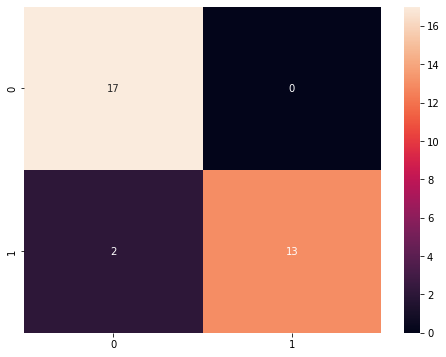

In [175]:
matrix = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))

plt.figure(figsize=(8,6))
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")
sns.heatmap(matrix, annot=True)
plt.show()

### Making predictions

In [180]:
predictions = pd.DataFrame(X_test)

predictions["Real Type"] = encoder.inverse_transform(y_test)
predictions["Predicted Type"] = encoder.inverse_transform(model.predict(X_test))

predictions.to_csv("test_prediction_result.csv", index=False)

predictions.head(10)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,Real Type,Predicted Type
0,0.0115,0.0150,0.0136,0.0076,0.0211,0.1058,0.1023,0.0440,0.0931,0.0734,...,0.0016,0.0084,0.0064,0.0026,0.0029,0.0037,0.0070,0.0041,R,R
1,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M,M
2,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,...,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,R,M
3,0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,...,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085,M,M
4,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051,R,R
5,0.0137,0.0297,0.0116,0.0082,0.0241,0.0253,0.0279,0.0130,0.0489,0.0874,...,0.0040,0.0025,0.0036,0.0058,0.0067,0.0035,0.0043,0.0033,M,M
6,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,R
7,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,R
8,0.0217,0.0152,0.0346,0.0346,0.0484,0.0526,0.0773,0.0862,0.1451,0.2110,...,0.0067,0.0011,0.0026,0.0049,0.0029,0.0022,0.0022,0.0032,M,M
9,0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,...,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066,M,M
